## Problem 2: Logistic Regression 1
Bryan Zhao, 24-787:B

**Goal:** Use both ordinary and regularized logistic regression to create a binary classifier. In this question, $\omega$ and $\theta$ are used interchangeably.

In [1]:
# Import all the packages you need to use:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import scipy.optimize as optimize
import scipy

In [3]:
# Load the data:

In [83]:
data = np.genfromtxt('P2data1.txt', delimiter = ',') # imports as a numpy nd-array
X = data[:, [0, 1]] # extract first two columns
X = np.c_[np.ones((data.shape[0], 1)), X] # append a column of 1's for theta_0
y = data[:, 2] # binary class
print('Data\'s dimensions:', data.shape)
print(data[0:10, :], '...')

Data's dimensions: (100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]] ...


In [5]:
# Plot the data:

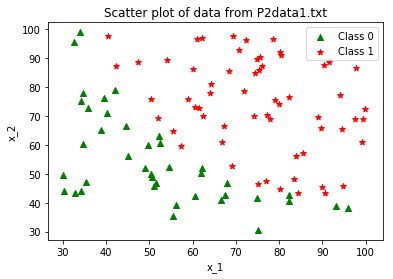

In [25]:
plt.scatter(X[:, 1][y==0], X[:,2][y==0], c='g', marker='^', label = 'Class 0');
plt.scatter(X[:, 1][y==1], X[:,2][y==1], c='r', marker='*', label = 'Class 1');
plt.title("Scatter plot of data from P2data1.txt")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend() # automatic placement of legend
plt.show() # show the plot

In [7]:
# Define the sigmoid function:

In [8]:
def sigmoid(x):
    # numpy can handle scalar, vector or matrices the same with .array() and .exp()
    return 1 / (1 + np.exp(-x)) 

In [9]:
# Define the compute cost function:

![cost_function](cost_fn_equation.png)

In [10]:
def compute_cost(theta, X, y):
    m = X.shape[0] # number of training samples
    sum = 0
    for i in range(m):
        sum += (-y[i]*log(sigmoid(theta[:].T.dot(X[i, :]))) - (1-y[i])*log(1 - sigmoid(theta[:].T.dot(X[i, :]))))
    cost = sum / m
    return cost

In [11]:
# Define the compute gradient function:

![gradient](grad_equation.png)

In [12]:
def compute_grad(theta, X, y):
    m = X.shape[0] # number of training samples
    grad = np.zeros(3)
    dim = 3 # or X.shape[1]
    for i in range(m):
        for j in range(dim):
            grad[j] += (sigmoid(theta[:].T.dot(X[i, :])) - y[i])*X[i, j]
    return grad/m

In [13]:
# Compute cost and gradient (The initial cost should be 0.69314718):

In [14]:
thetas_init = np.zeros(3) 
res_grad = compute_grad(thetas_init, X, y)
res_cost = compute_cost(thetas_init, X, y)
print('Cost:', res_cost)
print('Gradient:', res_grad) # need to fix results of gradient!

Cost: 0.6931471805599458
Gradient: [ -0.1        -12.00921659 -11.26284221]


In [15]:
# Optimize the cost to find the minimum cost by using fmin_tnc:
# The optimal cost should be 0.2034977:

In [16]:
res = optimize.fmin_tnc(compute_cost, thetas_init, approx_grad=1, args = (X, y), epsilon=1.0E-6)
print('Optimization result:', res) # returns ndarray (solution), nfeval, return code
learned_thetas = res[0]
print('Optimized cost:', compute_cost(learned_thetas, X, y))

Optimization result: (array([-25.15955613,   0.20621649,   0.20145867]), 77, 1)
Optimized cost: 0.20349770212935675


In [17]:
# Define a predict function to calculate the result:

In [18]:
def predict(theta, X):
    prediction = sigmoid(X.dot(theta.T)) > 0.5 # find P(y=1) > 0.5
    return prediction.astype(int)

In [19]:
# Find the accuracy of the logistic regression:

In [82]:
prediction = predict(learned_thetas, X)
comparison = (prediction == y) # element-wise comparison
num_correct = np.count_nonzero(comparison) # count number of matches
print('Accuracy of logistic regression: {}%'.format(num_correct/y.size))

Accuracy of logistic regression: 0.89%


In [21]:
# Plot the data and boundary:

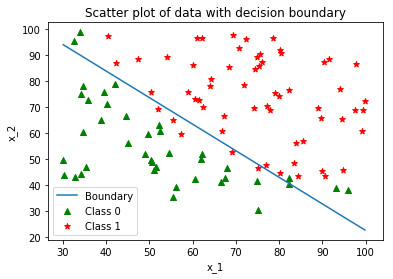

In [78]:
plt.scatter(X[:, 1][y==0], X[:,2][y==0], c='g', marker='^', label = 'Class 0');
plt.scatter(X[:, 1][y==1], X[:,2][y==1], c='r', marker='*', label = 'Class 1');

# plot decision boundary
# x2 = (-w0 - w1*x1)/w2
x_bound = np.linspace(X[:,1].min(), X[:,1].max(), 300)
y_bound = (-learned_thetas[0] - learned_thetas[1]*x_bound)/learned_thetas[2]
plt.plot(x_bound, y_bound, label = 'Boundary')

plt.title("Scatter plot of data with decision boundary")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend() # automatic placement of legend
plt.show() # show the plot